# Flow cytometry reveals that expression of RNA exporters is not toxic

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/flow_toxicity"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

In [4]:
infile = "../preprocessed_data/flow_data/flow_toxicity_summary.csv"
df_raw = pd.read_csv(infile, index_col=0)
print(df_raw.shape)
df_raw

(45, 8)


,sample,stain,replicate,best,n_events,n_dead+,frac_dead+,percent_dead+
well,,,,,,,,
D5,HeatKilled_DeadStain,dead,1,True,30000,28116,0.937200,93.720000
E5,HeatKilled_DeadStain,dead,2,True,30000,28185,0.939500,93.950000
F5,HeatKilled_DeadStain,dead,3,True,30000,28452,0.948400,94.840000
D2,NoDNA_DeadStain,dead,1,True,30000,1356,0.045200,4.520000
E2,NoDNA_DeadStain,dead,2,True,30000,1036,0.034533,3.453333
...,...,...,...,...,...,...,...,...
B12,mCh-Psi,dead,2,True,30000,1033,0.034433,3.443333
C12,mCh-Psi,dead,3,True,30000,1212,0.040400,4.040000
D1,mCh-MS2x12,dead,1,True,16886,962,0.056970,5.697027


In [5]:
df = df_raw

# Plot abundance of dead+ events

In [6]:
# Set colors

color_exporter = "#b7ade3"
color_no_exporter = "#83888a"
color_heat_killed = "#f5b577"

color_edge = "#010101"

In [7]:
# Set order of samples
samples_ordered = ["Gag_mCh-Psi", 
                "Gag_mCh",
                "Gag-MCP_mCh-MS2x12", 
                "Gag-MCP_mCh", 
                "GagZip-MCP_mCh-MS2x12", 
                "GagZip-MCP_mCh", 
                "EPN24-MCP_mCh-MS2x12", 
                "EPN24-MCP_mCh",
                "EPN11-MCP_mCh-MS2x12", 
                "EPN11-MCP_mCh",
                "mCh-Psi",
                "mCh-MS2x12",
                "mCh",
                "NoDNA_DeadStain",
                "HeatKilled_DeadStain"]

df["sample"] = pd.Categorical(df["sample"], categories=samples_ordered, ordered=True)  # convert to categorical with order

df = df.sort_values(by=["sample", "replicate"], ascending=False)  # sort values by sample

df.head()

,sample,stain,replicate,best,n_events,n_dead+,frac_dead+,percent_dead+
well,,,,,,,,
F5,HeatKilled_DeadStain,dead,3,True,30000,28452,0.948400,94.840000
E5,HeatKilled_DeadStain,dead,2,True,30000,28185,0.939500,93.950000
D5,HeatKilled_DeadStain,dead,1,True,30000,28116,0.937200,93.720000
F2,NoDNA_DeadStain,dead,3,True,22705,1396,0.061484,6.148425
E2,NoDNA_DeadStain,dead,2,True,30000,1036,0.034533,3.453333


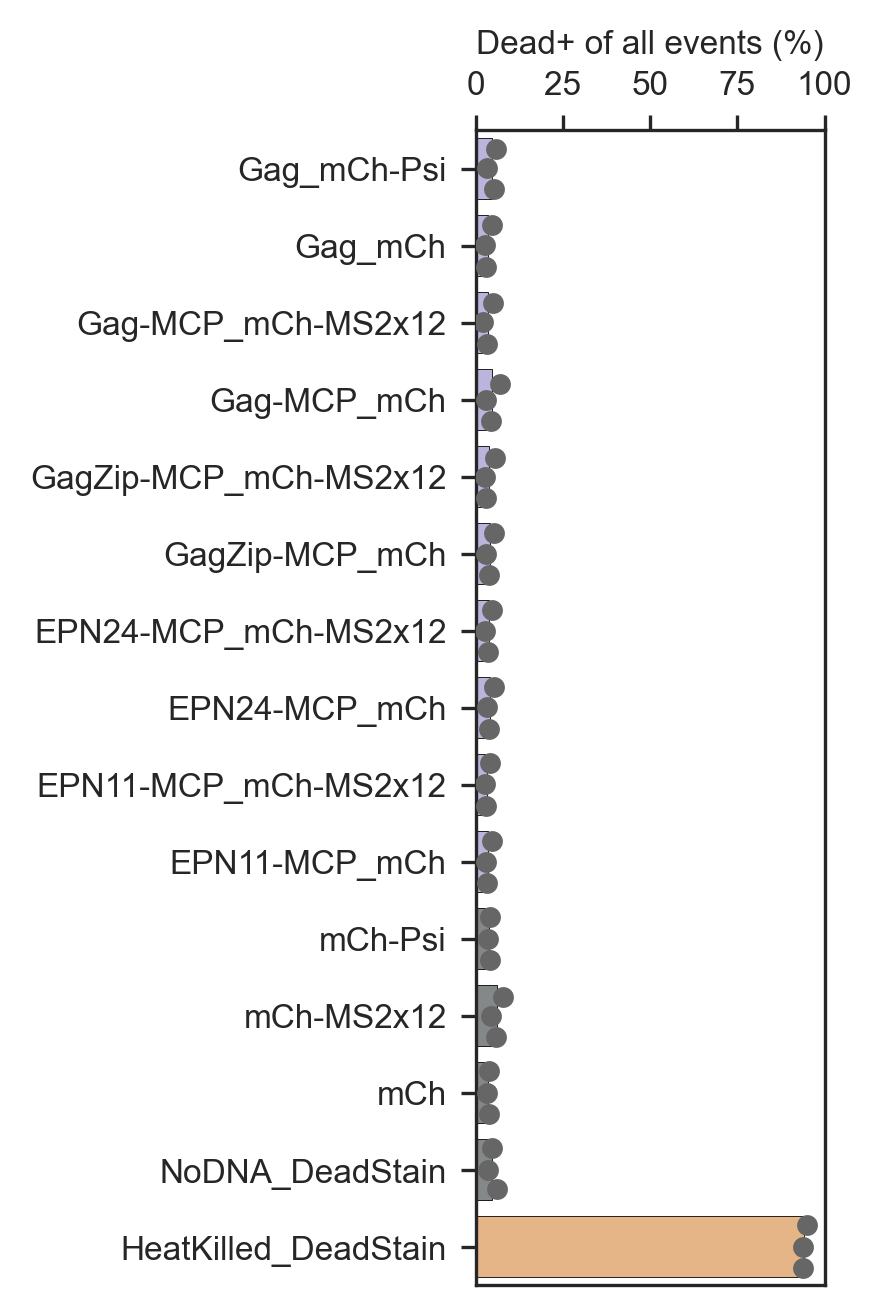

In [8]:
# Pretty plot of all samples (not scaled optimally)

palette = [color_exporter]*10 + [color_no_exporter]*4 + [color_heat_killed]
# palette = palette[::-1]

fig, ax = plt.subplots(1, 1, figsize=(1.5,5))

sns.barplot(ax=ax, data=df,
            y="sample",
            x="percent_dead+",
            label="sample",
            palette=palette,
            edgecolor=color_edge,
            linewidth=0.2,
            errorbar=None,
            orient="h")

sns.swarmplot(ax=ax, data=df,
            y="sample",
            x="percent_dead+",
            color="#666666",
            orient="h")

ax.set_xlim(0,100)
ax.set_xticks([0,25,50,75,100])
# ax.set_ylim(14.75, -0.75)

ax.set_xlabel("Dead+ of all events (%)")
ax.set_ylabel("")

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.get_legend().remove()

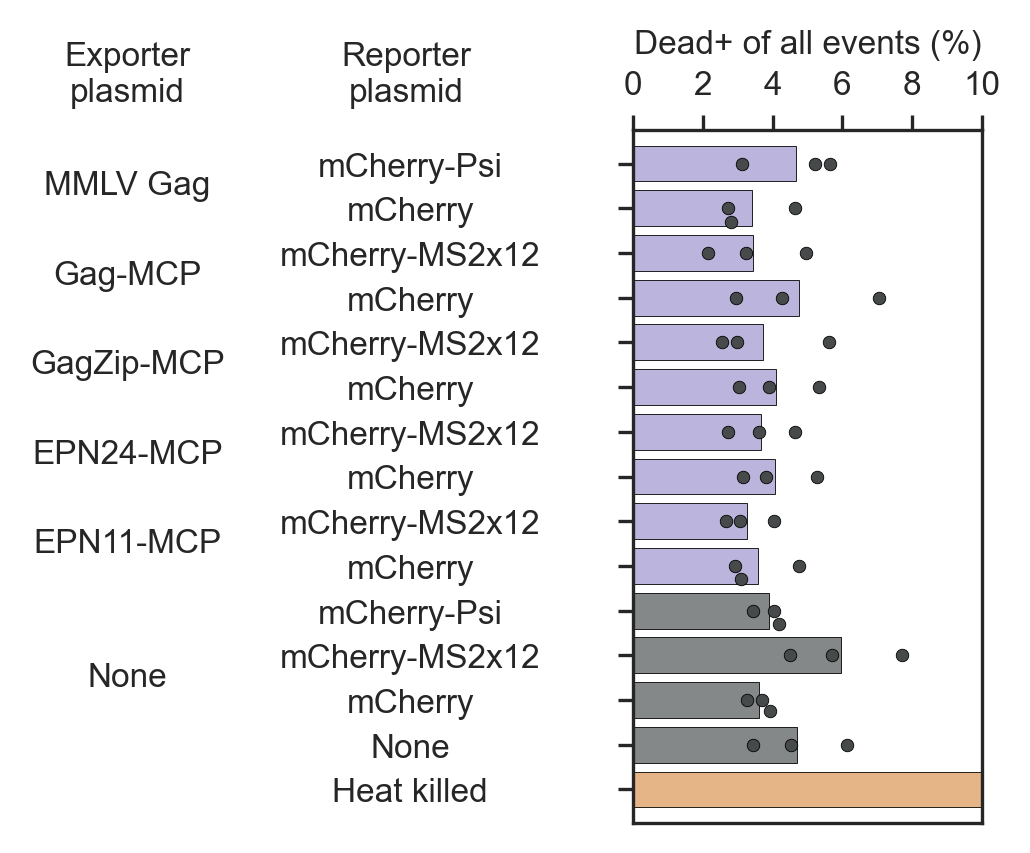

In [9]:
# Plot zoomed into relevant samples

labels_exporter = ["MMLV Gag", "Gag-MCP", "GagZip-MCP", "EPN24-MCP", "EPN11-MCP", "None", ""]

labels_reporter = ["mCherry-Psi", "mCherry",
             "mCherry-MS2x12", "mCherry",
             "mCherry-MS2x12", "mCherry",
             "mCherry-MS2x12", "mCherry", 
             "mCherry-MS2x12", "mCherry",
             "mCherry-Psi", "mCherry-MS2x12", "mCherry", "None",
             "Heat killed"]

palette = [color_exporter]*10 + [color_no_exporter]*4 + [color_heat_killed]

fig, ax = plt.subplots(1, 1, figsize=(1.5,3))

sns.barplot(ax=ax, data=df,
            y="sample",
            x="percent_dead+",
            label="sample",
            palette=palette,
            edgecolor=color_edge,
            linewidth=0.2,
            errorbar=None,
            orient="h")

sns.swarmplot(ax=ax, data=df,
            y="sample",
            x="percent_dead+",
            color="#474a4b",
            size=3,
            edgecolor="#010101",
            linewidth=0.2,
            orient="h")

ax.set_xlim(0, 10)
ax.set_ylim(14.75, -0.75)

ax.set_xticks([0, 2, 4, 6, 8, 10])

ax.set_xlabel("Dead+ of all events (%)")
ax.set_ylabel("")

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

# Set custom tick labels
ax.set_yticklabels(labels_reporter, ha="center")
ax.tick_params(axis="y", which="major", pad=50)

# Set custom tick text annotations
x_pos_labels_exporter = -14.5
y = range(int(df.shape[0]/3))

y_labels_exporter = [(y[0] + y[1])/2, 
                     (y[2] + y[3])/2, 
                     (y[4] + y[5])/2, 
                     (y[6] + y[7])/2, 
                     (y[8] + y[9])/2, 
                     (y[10] + y[11] + y[12] + y[13])/4,
                     (y[14])] 
for label, y_pos in zip(labels_exporter, y_labels_exporter):
    ax.text(x_pos_labels_exporter, y_pos, label, ha="center", va="center", size=FONTSIZE)

# Set tick annotation column labels
ax.text(x_pos_labels_exporter, y[0]-2, "Exporter\nplasmid", ha="center", va="center", size=FONTSIZE)
ax.text(x_pos_labels_exporter + 8, y[0]-2, "Reporter\nplasmid", ha="center", va="center", size=FONTSIZE)

ax.get_legend().remove()

save_figure(fig, "swarmplot_dead")

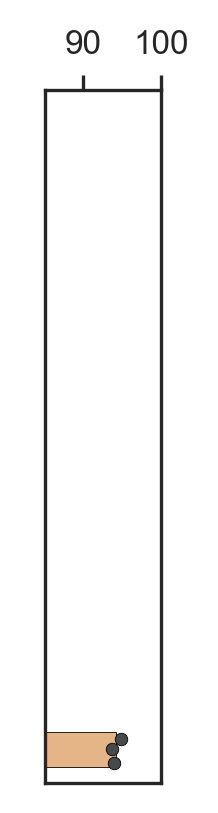

In [10]:
# Plot positive control for making broken axis plot

fig, ax = plt.subplots(1, 1, figsize=(0.5,3))

sns.barplot(ax=ax, data=df,
            y="sample",
            x="percent_dead+",
            label="sample",
            palette=palette,
            edgecolor=color_edge,
            linewidth=0.2,
            errorbar=None,
            orient="h")

sns.swarmplot(ax=ax, data=df,
            y="sample",
            x="percent_dead+",
            color="#474a4b",
            size=3,
            edgecolor="#010101",
            linewidth=0.2,
            orient="h")

ax.set_xlim(85,100)
ax.set_ylim(14.75, -0.75)

ax.set_xlabel("Dead+ of all events (%)")
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_xticks([90, 100])

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

ax.set_yticks([])

ax.get_legend().remove()

save_figure(fig, "swarmplot_dead_positive_control")